<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/Lab%201/q8-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multiple Regression On Video Game Dataset To Predict Sales

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
import io
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [0]:
vGDatasetFile = files.upload()

Saving Video_Games_Sales.csv to Video_Games_Sales.csv


In [0]:
#To open our dataset file using pandas
vGDataset = pd.read_csv(io.StringIO(vGDatasetFile['Video_Games_Sales.csv'].decode('utf-8')))

In [0]:
#To Show the first five rows in our dataset
vGDataset.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# To show some infromation about Features and dataset
vGDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


It Shows that there are 16719 rows and 16 features. There are alot of null values in our dataset. So, next step is to hundle null values.

##Remove Null Values

In [0]:
#First we get all the numeric features that we need to train our model
vGDatasetNumeric = vGDataset.select_dtypes(include=[np.number])
vGDatasetNumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 9 columns):
Year_of_Release    16450 non-null float64
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Count         7590 non-null float64
dtypes: float64(9)
memory usage: 1.1 MB


In [0]:
vGDatasetNulls = pd.DataFrame(vGDatasetNumeric.isnull().sum().sort_values(ascending=False)[:25])
vGDatasetNulls.columns = ['Null Values Count']
vGDatasetNulls.index.name = 'Feature'
print(vGDatasetNulls)

                 Null Values Count
Feature                           
User_Count                    9129
Critic_Count                  8582
Critic_Score                  8582
Year_of_Release                269
Global_Sales                     0
Other_Sales                      0
JP_Sales                         0
EU_Sales                         0
NA_Sales                         0


In [0]:
#To remove year of release feature since we do not need it in our training dataset
vGDatasetNumeric = vGDatasetNumeric.drop('Year_of_Release',axis=1)
vGDatasetNumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 8 columns):
NA_Sales        16719 non-null float64
EU_Sales        16719 non-null float64
JP_Sales        16719 non-null float64
Other_Sales     16719 non-null float64
Global_Sales    16719 non-null float64
Critic_Score    8137 non-null float64
Critic_Count    8137 non-null float64
User_Count      7590 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [0]:
#To remove null values from the following features we used fillna() function to fill the null values with mean values
vGDatasetNumeric.User_Count.fillna(vGDatasetNumeric.User_Count.mean(),inplace=True)
vGDatasetNumeric.Critic_Count.fillna(vGDatasetNumeric.Critic_Count.mean(),inplace=True)
vGDatasetNumeric.Critic_Score.fillna(vGDatasetNumeric.Critic_Score.mean(),inplace=True)


In [0]:
#To check if the null values are all filled in by the mean
vGDatasetNulls = pd.DataFrame(vGDatasetNumeric.isnull().sum().sort_values(ascending=False)[:25])
vGDatasetNulls.columns = ['Null Values Count']
vGDatasetNulls.index.name = 'Feature'
print(vGDatasetNulls)


              Null Values Count
Feature                        
User_Count                    0
Critic_Count                  0
Critic_Score                  0
Global_Sales                  0
Other_Sales                   0
JP_Sales                      0
EU_Sales                      0
NA_Sales                      0


##TP find the top correlated features to the target label (Global_Sales)

In [0]:
vGDatasetCorr = vGDatasetNumeric.corr()
print(vGDatasetCorr['Global_Sales'].sort_values(ascending=False),'\n')

Global_Sales    1.000000
NA_Sales        0.941010
EU_Sales        0.901239
Other_Sales     0.749242
JP_Sales        0.612300
Critic_Count    0.248545
User_Count      0.216355
Critic_Score    0.200976
Name: Global_Sales, dtype: float64 



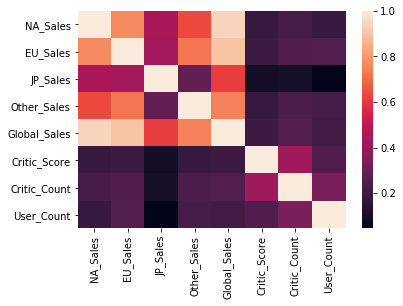

In [0]:
sns.heatmap(vGDatasetCorr)

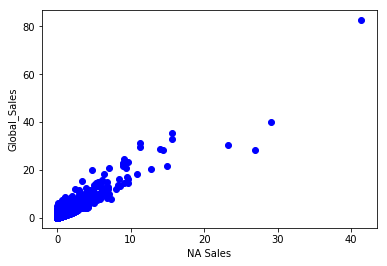

In [0]:
#To Show the relation between Global_Sales and and NA Sales
plt.scatter(vGDatasetNumeric.NA_Sales, vGDatasetNumeric.Global_Sales, color='blue')
plt.xlabel('NA Sales')
plt.ylabel('Global_Sales')
plt.show()

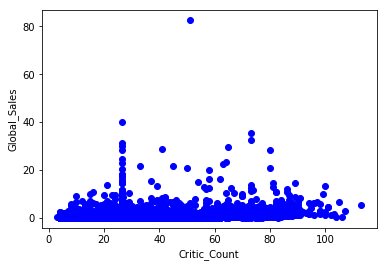

In [0]:
#To Show the relation between Global_Sales and and Critic count
plt.scatter(vGDatasetNumeric.Critic_Count, vGDatasetNumeric.Global_Sales, color='blue')
plt.xlabel('Critic_Count')
plt.ylabel('Global_Sales')
plt.show()

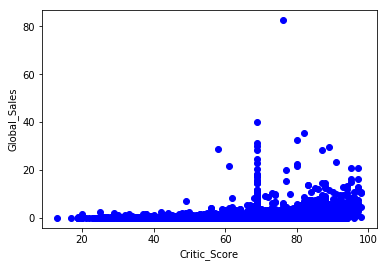

In [0]:
#To Show the relation between Global_Sales and and Critic Score

plt.scatter(vGDatasetNumeric.Critic_Score, vGDatasetNumeric.Global_Sales, color='blue')
plt.xlabel('Critic_Score')
plt.ylabel('Global_Sales')
plt.show()

## To Split Data set

In [0]:
#To set up the x axis features and target feature

vGDatasetNumeric_X = vGDatasetNumeric.drop('Global_Sales',axis=1)

vGDatasetNumeric_Y = vGDatasetNumeric['Global_Sales']

In [0]:
vGDatasetNumeric_X.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count
0,41.36,28.96,3.77,8.45,76.000000,51.000000,322.000000
1,29.08,3.58,6.81,0.77,68.967679,26.360821,162.229908
2,15.68,12.76,3.79,3.29,82.000000,73.000000,709.000000
3,15.61,10.93,3.28,2.95,80.000000,73.000000,192.000000
4,11.27,8.89,10.22,1.00,68.967679,26.360821,162.229908


In [0]:
vGDatasetNumeric_Y.head(5)

0    82.53
1    40.24
2    35.52
3    32.77
4    31.37
Name: Global_Sales, dtype: float64

In [0]:
#To split the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(vGDatasetNumeric_X, vGDatasetNumeric_Y, test_size=0.20)


##To Create Model

In [0]:
#To crate and train our model
vGDMRegr = linear_model.LinearRegression()
vGDModel = vGDMRegr.fit(X_train, Y_train)


##Evaluation Metrics and Prediction


In [0]:
#To predict
Y_pred = vGDModel.predict(X_test)

#Evaluation Metrics

print('R^2 score:', vGDModel.score(X_test, Y_test))
print ('RMSE is: ', np.sqrt(mean_squared_error(Y_test, Y_pred)))

R^2 score: 0.9999793247963978
RMSE is:  0.005281939933429833


##Result Visualization

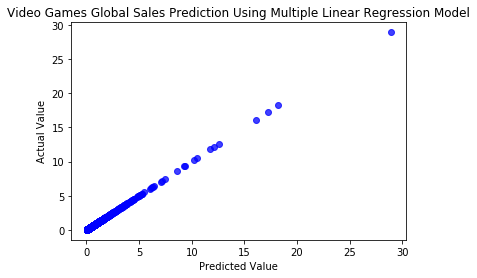

In [0]:
plt.scatter(Y_pred, Y_test, alpha=.75, color='blue',) 
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Video Games Global Sales Prediction Using Multiple Linear Regression Model')
plt.savefig('Video Games Global Sales.png', bbox_inches = 'tight')
plt.show()